In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import string
import nltk
import contractions
import spacy
from spacy.language import Language  
from spacy_language_detection import LanguageDetector
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import MWETokenizer, word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

df = pd.read_csv('/kaggle/input/cleaned-text-data/cleaned_text_data.csv',index_col = 'book_title')
df.head()

,book_details,Fantasy,Young Adult,Classics,Romance,Historical Fiction
book_title,,,,,,
Harry Potter and the Half-Blood Prince,middle summer unseasonal mist press windowpane...,True,True,False,False,False
Harry Potter and the Order of the Phoenix,harry potter start fifth year hogwart school w...,False,True,False,False,False
Harry Potter and the Sorcerer's Stone,harry potter idea famous raise miserable aunt ...,True,True,False,False,False
Harry Potter and the Prisoner of Azkaban,harry potter along good friend ron hermione st...,True,True,False,False,False
Harry Potter and the Goblet of Fire,summer holiday soon harry potter start fourth ...,True,True,False,False,False


<Axes: title={'center': 'Label Genre'}>

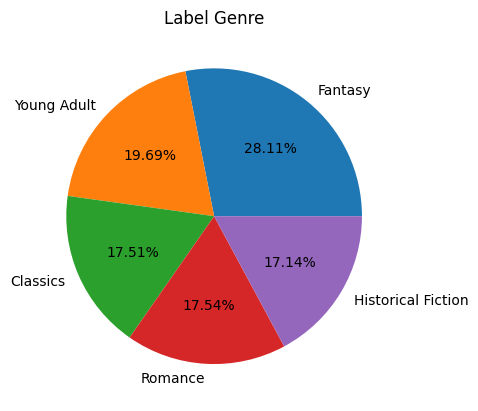

In [2]:
label_cols = ['Fantasy','Young Adult','Classics','Romance','Historical Fiction']
df[label_cols].sum().plot(kind = 'pie', autopct = '%.2f%%', title = 'Label Genre')

<Axes: title={'center': "Book's label counts"}>

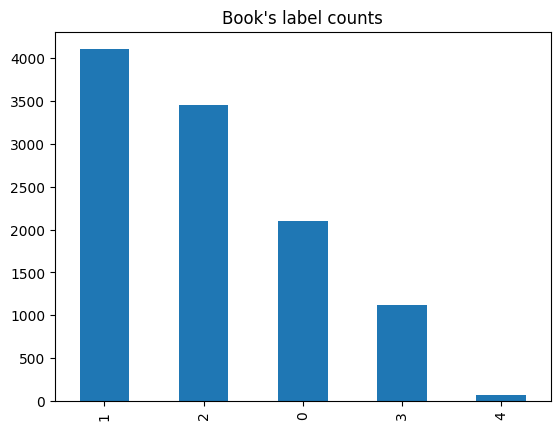

In [3]:
df[label_cols].sum(axis = 1).value_counts().plot(kind = 'bar', title = 'Book\'s label counts' )

Text(0.5, 1.0, "Labels' relation ratio")

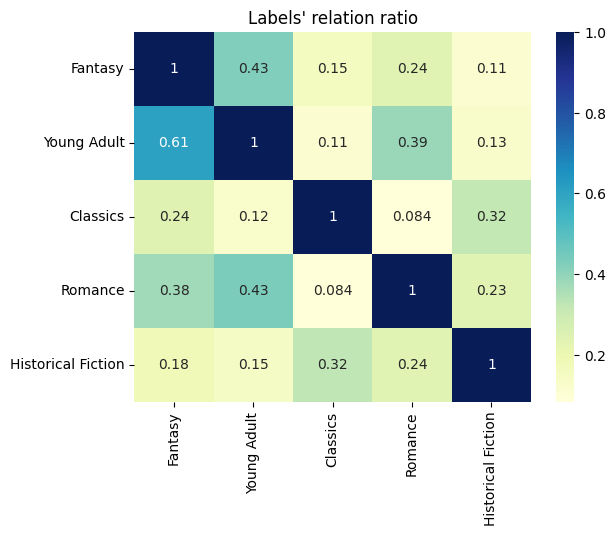

In [4]:
def count_label(df,all_cols, target_col):
    filtered_df = df[df[target_col]]
    return [len(filtered_df[filtered_df[col]])/len(filtered_df) for col in all_cols]

contingency_table = np.array([
    count_label(df,label_cols,col) for col in label_cols
])

fig = sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", 
                  xticklabels=label_cols, yticklabels=label_cols)

fig.set_title('Labels\' relation ratio')

In [9]:
from sklearn.model_selection import train_test_split

train,val = train_test_split(df,test_size = 0.15 , random_state = 42)

In [11]:
train.to_csv('train_data.csv')
val.to_csv('val_data.csv')